# Double Deep Q-Network (DQN) using PyTorch
Environment: LunarLander-v2

### Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pyvirtualdisplay
!apt-get install xvfb

# display = Display(visible=0, size=(1400, 900))
# display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [3]:
# Import TensorFlow library for deep learning
import tensorflow as tf

# Import modules from Keras for building the neural network
from tensorflow.keras import *

# Import layers from Keras for constructing the network architecture
from tensorflow.keras.layers import *

# Import optimizers from Keras for training the network
from tensorflow.keras.optimizers import *

# Import loss functions from Keras for calculating the loss
from tensorflow.keras.losses import *

# Import deque from collections for creating a queue
from collections import deque

# Import trange from tqdm for creating a progress bar
from tqdm import trange

# Import random module for random number generation
import random

# Import time module for timing purposes
import time
import gym
import numpy as np
import tensorflow as tf
!apt-get install -y python3-dev libffi-dev libxml2-dev libxslt1-dev zlib1g-dev libjpeg-dev libfreetype6-dev libpng-dev libopenjp2-7-dev swig
!pip install box2d-py


# Import threading module for multithreading support
import threading
import gym
import Box2D


/usr/local/lib/python3.10/dist-packages/jaxlib/xla_client.py:225: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  float8_e4m3b11fnuz = ml_dtypes.float8_e4m3b11


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libpng-dev is already the newest version (1.6.37-2).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
libfreetype6-dev is already the newest version (2.10.1-2ubuntu0.3).
libopenjp2-7-dev is already the newest version (2.3.1-1ubuntu4.20.04.1).
libopenjp2-7-dev set to manually installed.
libxml2-dev is already the newest version (2.9.10+dfsg-5ubuntu0.20.04.6).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-2ubuntu1.5).
zlib1g-dev set to manually installed.
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  libffi-dev libxslt1-dev swig swig4.0
0 upgraded, 4 newly installed, 0 to remove and 14 not upgraded.
Need

## Specify the Environment, and Explore the State and Action Spaces
* Let's begin with an initializing the environment


In [4]:
# Create an environment
env = gym.make('LunarLander-v2')
env.seed(0);
print('State space: ', env.observation_space)
print('State shape: ', env.observation_space.shape)

print('Action space: ', env.action_space)
print('Number of actions: ', env.action_space.n)


State space:  Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
State shape:  (8,)
Action space:  Discrete(4)
Number of actions:  4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


### Implement Q-Network
Building the Network: Actor (policy) Model
input_size = state_size
output_size = action_size
using same seed
hidden_layers: fc1, fc2

Define Layer of model: [FC-RELU-FC-RELU-FC]

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        '''
        Builds a feedforward nework with two hidden layers
        Initialize parameters

        Params
        =========
        state_size (int): Dimension of each state (input_size)
        action_size (int): dimension of each action (output_size)
        seed (int): Random seed(using 0)
        fc1_units (int): Size of the first hidden layer
        fc2_units (int): Size of the second hidden layer
        '''
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        # Add the first laer, input to hidden layer
        self.fc1 = nn.Linear(state_size, fc1_units)
        # Add more hidden layer
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """
        Forward pass through the network. Build a network that mps state -> action values.
        """
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)




In [21]:
!pip install torchviz
import torchviz
from torchviz import make_dot
# Create an instance of the QNetwork
state_size = 4
action_size = 2
seed = 0
model = QNetwork(state_size, action_size, seed)

# Generate a dummy input tensor
dummy_input = torch.randn(1, state_size)

# Create a graph of the network architecture
graph = make_dot(model(dummy_input), params=dict(model.named_parameters()))

# Save the graph to a file
graph.render("network_architecture", format="png")

# Display the graph
graph.view()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=1f555e05d5e00d90b924ecfd5c9817a9852aa5411ac6e0fad17f693b651ac663
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


/usr/local/lib/python3.10/dist-packages/torchviz/dot.py:65: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.9") and \


'network_architecture.pdf'

# Experience Replay

### Set finite memory size N
Algorithm only stores the last N experience tuples in the replay memory, and sample uniformly at random from D when performing updates. The memory buffer does not differentiate imporant transitions and always overwrites with recent transitions owing to the finitre memory size N.

Uniform sampling gives equal importance to all transitions in the replay memory

We store each experienced tuple in the buffer as we are interacting with the environment and then sample a small bath of tuples from it in order to learn. Therefore, we are able to learn from individual tuples multiple times

Sequential order runs the risk of getting swayed by the effect of the correlations.

With experience replay, can sample from this buffer at random

Randomizing the samples breaks these correlations and therefore reduces the variance of the updates

In [7]:
import numpy as np
import random
from collections import namedtuple, deque

class ReplayBuffer:
    def __init__(self, action_size, buffer_size, batch_size, seed):
        '''
        Only stroes the last N experience tuples in the replay memory

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        '''
        # Initialize replay memory
        self.acion_size = action_size
        self.memory = deque(maxlen=buffer_size) # set N memory size
        self.batch_size = batch_size
        # build named experience tuples
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        '''
        we store the agent's experiences at each time-step, e_t = (s_t,a_t,r_t,s_(t+1))
        '''
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        '''
        Samples uniformly at random from D(D_t = {e_1,...,e_t}) when  performing updates
        '''
        # D
        experiences = random.sample(self.memory, k=self.batch_size)
        #store in
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device) # gpu
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        # return D
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        '''
        Return the current size of internal memory
        '''
        return len(self.memory)




### Implement agent
* Agent(state_size=8, action_size=4, seed=0)

In [8]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

# hyperparameters
LR = 5e-4                # learning rate
BUFFER_SIZE = int(1e5)   # replay buffer size N
BATCH_SIZE = 64          # minibatch size
UPDATE_EVERY = 4         # how often to update the network
GAMMA = 0.99             # Discount factor
TAU = 1e-3               # for soft update of target parameters


# Setup Gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Build Agent(): Evaluate our agent on unmodified games (dqn agent)
class Agent():
    """

    """
    def __init__(self, state_size, action_size, seed): #8, 4, 0
        """
        Initialize an Agent object.
        Params
        ======
            state_size (int): dimension of each state = 8
            action_size (int): dimension of each action = 4
            seed (int): random seed = 0
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Q-Network: Neural network function approx. with weights theta θ as a Q-Network.
        # A Q-Network can be trained by adjusting the parameters θ_i at iteration i to reduce the mse in the Bellman equation
        # The outputs correspond to the predicted Q-values of the individual action for input state
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device) # gpu
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        # specify optimizer(Adam)ms
        # optim.Adam(Qnet.parameters(), small learning rate)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR) ###

        # First, use a technique known as experience replay in which we stre the agent's experience at each time-step,
        # e_t= (s_t, a_t, r_t, s_(t_1)), in a data set D_t ={e_1,...,e_t},pooled over many episodes(where the end of an episode occurs when
        # a terminal state is reached) into a replay memory.
        #Initialize replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed) ###
        # Initialize time step (update every UPDATE_EVERY steps)
        self.t_step = 0

    def load_model(self, checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        self.qnetwork_local.load_state_dict(checkpoint['qnetwork_local_state_dict'])
        self.qnetwork_target.load_state_dict(checkpoint['qnetwork_target_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.memory = checkpoint['memory']
        self.t_step = checkpoint['t_step']

    def step(self, state, action, reward, next_state, done):
        # save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps
        self.t_step =(self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # if enough samples are availabe in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE: ###
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA) ###

    def act(self, state, eps=0):
        '''
        Choose action A from state S using policy pi <- epsilon-Greedt(q^hat (S,A,w))
        Return actions for given state as per current policy.

        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        '''
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # It is off-policy: it learns about the greedy policy a = argmax Q(s,a';θ),
        # while following a behaviour distribution is often selected by an eps-greedy policy
        # that follows the greey policy with probability 1-eps and selects a random action
        # with probability eps.
        # Epsilon-greedy action selection
        #
        # with probability epsilon select a random action a_t
        # otherwise select a_t = argmax_a Q (phi(s_t),a; θ)
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma): #----only use the local and target Q-networks to compute the loss before taking a step towards minimizing the loss
        '''
        Update value parameters using given batch of experience tuples

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor

        '''
        states, actions, rewards, next_states, dones = experiences
        #####DQN
        ## Get max predicted Q values (for next states) from target model
        #Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        #
        ## Compute Q targets for current states
        #Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        #
        ## Get expected Q values from local model
        #Q_expected = self.qnetwork_local(states).gather(1, actions)

        ##### Double DQN
        self.qnetwork_local.eval()
        with torch.no_grad():
            # fetch max action arguemnt to pass
            Q_pred = self.qnetwork_local(next_states)
            max_actions = torch.argmax(Q_pred, dim=1).long().unsqueeze(1)
            # Q_targets over next statesfrom actions will be taken based on Q_pred's max_action
            Q_next = self.qnetwork_target(next_states)
        self.qnetwork_local.train()
        Q_targets = rewards + (gamma * Q_next.gather(1, max_actions) * (1.0 - dones))
        ## Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)


        ###############
        # apply loss fucntion
        # calculate the loss
        loss = F.mse_loss(Q_expected, Q_targets)

        # zero the parameter (weight) gradients
        self.optimizer.zero_grad()

        # backward pass to calculate the parameter gradients
        loss.backward()

        # update the parameters
        self.optimizer.step()

        #################
        #Update target network
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU) ###
    def load_model(self, checkpoint_path):
      checkpoint = torch.load(checkpoint_path)
      self.qnetwork_local.load_state_dict(checkpoint['qnetwork_local_state_dict'])
      self.qnetwork_target.load_state_dict(checkpoint['qnetwork_target_state_dict'])
      self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
      self.memory = checkpoint['memory']
      self.t_step = checkpoint['t_step']

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)






# Watch an untrained agent

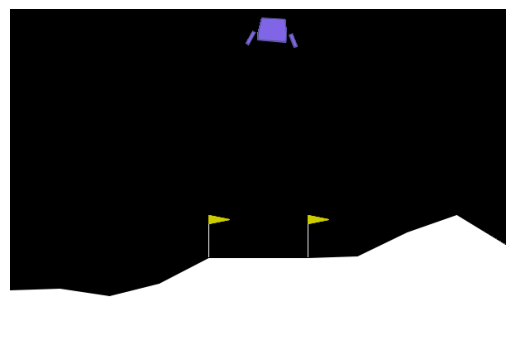

In [13]:
agent = Agent(state_size=8, action_size=4, seed=0)

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for j in range(10):
    action = agent.act(state)
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break

env.close()

# Train the Agent with DQN
Train Deep Q-Learning with
* maximum number of training episodes: 2000
* maximum number of timesteps per episode: 1000
* starting value of epsilon for epsilon-greedy action selection: 1.0
* minimum value of epsilon: 0.01
* multiplacative factor (per episode for decreasing epsilon: 0.995

In [9]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


0.995
Episode 1	 Average Score: -141.81	 Epsilon: 0.990.990025
Episode 2	 Average Score: -126.11	 Epsilon: 0.990.985074875
Episode 3	 Average Score: -197.03	 Epsilon: 0.990.9801495006250001
Episode 4	 Average Score: -219.34	 Epsilon: 0.980.9752487531218751
Episode 5	 Average Score: -194.97	 Epsilon: 0.980.9703725093562657
Episode 6	 Average Score: -169.77	 Epsilon: 0.970.9655206468094844
Episode 7	 Average Score: -164.39	 Epsilon: 0.970.960693043575437
Episode 8	 Average Score: -165.04	 Epsilon: 0.960.9558895783575597
Episode 9	 Average Score: -191.01	 Epsilon: 0.960.9511101304657719
Episode 10	 Average Score: -187.99	 Epsilon: 0.950.946354579813443
Episode 11	 Average Score: -182.95	 Epsilon: 0.950.9416228069143757
Episode 12	 Average Score: -176.60	 Epsilon: 0.940.9369146928798039
Episode 13	 Average Score: -170.02	 Epsilon: 0.940.9322301194154049
Episode 14	 Average Score: -176.10	 Epsilon: 0.930.9275689688183278
Episode 15	 Average Score: -167.60	 Epsilon: 0.930.9229311239742362
Ep

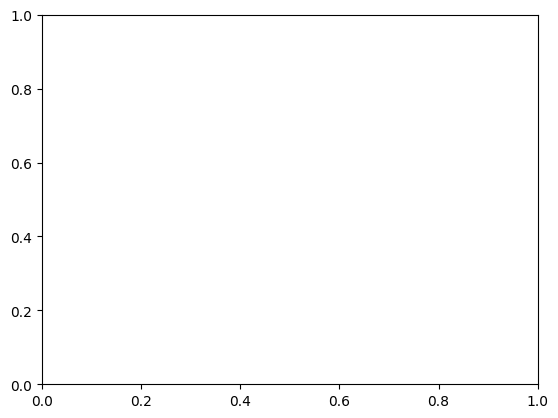

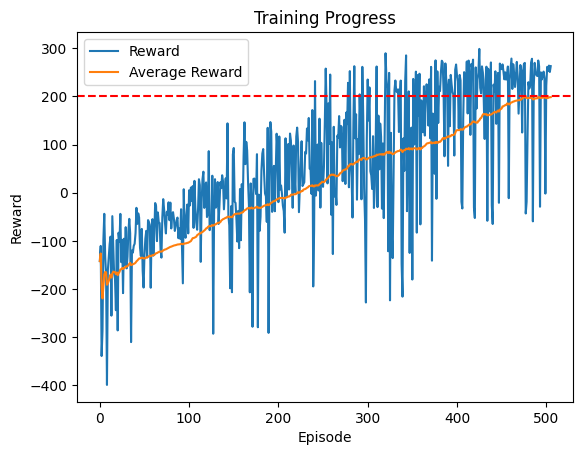

In [167]:
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt

# double DQN
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    Train the Agent with Deep Q-Learning

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon

    Returns
    =======
        scores (list): list of scores obtained in each episode
        average_score (float): average score over the last 100 episodes
        eps_values (list): list of epsilon values over the episodes
    """
    # Initialize collecting scores from each episode
    scores = []
    # Initialize collecting maxlen(100) scores
    scores_window = deque(maxlen=100)
    # initialize starting value of epsilon
    eps = eps_start
    # Create an empty list to store epsilon values
    eps_values = []

    # Create a figure and subplot for both scores and epsilon values
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # for each episode----------------
    for i_episode in range(1, n_episodes + 1):
        # begin the episode
        state = env.reset()
        # initialize the sampled score(reward)
        score = 0

        # Set constrain maximum number of time step per episode
        for t in range(max_t):
            # agent select an action
            action = agent.act(state, eps)
            # agent performs the selected action
            next_state, reward, done, _ = env.step(action)
            # agent performs internal updates based on sampled experience
            agent.step(state, action, reward, next_state, done)
            # update the sampled reward
            score += reward
            # update the state (s <- s') to next time step
            state = next_state
            if done:
                break
        # Save most recent score
        scores_window.append(score)
        # Save most recent score
        scores.append(score)
        # Decrease epsilon
        eps = max(eps_end, eps_decay * eps)
        # Append current epsilon value to eps_values list
        eps_values.append(eps)
        print(eps)

        # monitor progress
        print('\rEpisode {}\t Average Score: {:.2f}\t Epsilon: {:.2f}'.format(i_episode, np.mean(scores_window), eps),
              end="")
        # get average reward from last 100 episodes
        if i_episode % 100 == 0:
            print('\rEpisode {}\t Average Score: {:.2f}\t Epsilon: {:.2f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window) >= 200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            # save model
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
# Plotting the rewards and goal line
# Plotting the rewards, average reward, and goal line
# Plotting the rewards, average reward, and goal line
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(len(scores)), scores, label='Reward')
    ax.plot(np.arange(len(scores)), [np.mean(scores[max(0, i - 100):i + 1]) for i in range(len(scores))], label='Average Reward')
    ax.axhline(y=200, color='r', linestyle='--')  # Add a red dashed line at y=200 for reference
    ax.set_ylabel('Reward')
    ax.set_xlabel('Episode')
    ax.set_title('Training Progress')
    ax.legend()
    plt.savefig('reward_plot.png')
    plt.show()


    average_score = np.mean(scores_window)
    return scores, average_score, eps_values

# double DQN
scores, average_score, eps_values = dqn()


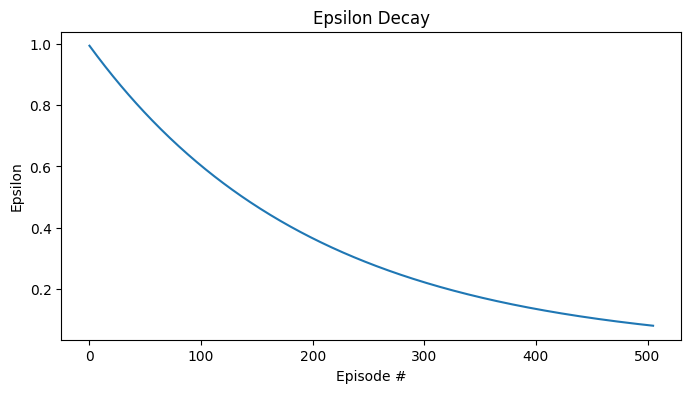

<function print>

In [168]:
import matplotlib.pyplot as plt

def plot_epsilon_values(eps_values):
    """
    Plot the epsilon values over the episodes.

    Params
    ======
        eps_values (list): list of epsilon values over the episodes
    """
    # Create a figure and subplot for epsilon values
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(np.arange(len(eps_values)), eps_values)
    ax.set_ylabel('Epsilon')
    ax.set_xlabel('Episode #')
    ax.set_title('Epsilon Decay')
    plt.savefig('epsilon_plot.png')
    plt.show()

plot_epsilon_values(eps_values)
print

In [10]:
import os
from PIL import Image

def create_gif(frames_dir, gif_path, fps=100, slow_factor=1):
    frames = []
    for filename in os.listdir(frames_dir):
        if filename.endswith(".png"):
            frames.append(Image.open(os.path.join(frames_dir, filename)))

    duration = int((1000 / fps) * slow_factor)  # Calculate duration based on desired fps and slow factor
    frames[0].save(gif_path, format='GIF', append_images=frames[1:], save_all=True, duration=duration, loop=0)



def save_episode_frames(frames, episode, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for i, frame in enumerate(frames):
        image = Image.fromarray(frame)
        image.save(f"{save_dir}/episode_{episode+1}_frame_{i+1}.png")

def test_agent(agent, env, num_episodes=2, save_frames=True, save_dir='frames'):
    scores = []

    for episode in range(num_episodes):
        state = env.reset()
        score = 0
        frames = []

        while True:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            score += reward
            state = next_state

            if save_frames:
                frames.append(env.render(mode='rgb_array'))

            if done:
                break

        scores.append(score)
        print(f"Episode {episode+1}: Score = {score}")

        if save_frames:
            save_episode_frames(frames, episode, save_dir)

    average_score = np.mean(scores)
    print(f"\nAverage Score over {num_episodes} episodes: {average_score}")



In [14]:
# Test the agent and save frames
# Load the saved weights into the agent's local Q-network
agent.qnetwork_local.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/checkpoint.pth'))

test_scores = test_agent(agent, env, num_episodes=10, save_frames=True, save_dir='frames')




Episode 1: Score = -52.44750374045158
Episode 2: Score = 266.4894266537675
Episode 3: Score = 305.8510258332428
Episode 4: Score = -14.173529743707618
Episode 5: Score = 231.3600024555185
Episode 6: Score = 237.5459768774704
Episode 7: Score = -39.725326941449225
Episode 8: Score = 240.85218779860082
Episode 9: Score = 238.75520216119023
Episode 10: Score = 296.717895529523

Average Score over 10 episodes: 171.12253568837048


In [15]:
# Create GIF animation from the saved frames
# create_gif('frames', 'animation.gif', slow_factor=6)

In [16]:
import os
import random
from PIL import Image

def create_gif(frames, gif_path, fps=100, slow_factor=1):
    duration = int((1000 / fps) * slow_factor)
    frames[0].save(gif_path, format='GIF', append_images=frames[1:], save_all=True, duration=duration, loop=0)


def save_frames_as_gif(episode_id, frames):
    gif_name = f'Animation_episode_{episode_id}.gif'

    # Convert the frames to Image objects
    images = [Image.fromarray(frame) for frame in frames]

    # Save the GIF using the Image objects
    images[0].save(
        gif_name,
        append_images=images[1:],
        save_all=True,
        duration=5,
        loop=0
    )

    return gif_name






def test_agent(agent, env, num_episodes=2, save_frames=True, save_dir='frames'):
    scores = []

    for episode in range(num_episodes):
        state = env.reset()
        score = 0
        frames = []

        while True:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            score += reward
            state = next_state

            if save_frames:
                frames.append(env.render(mode='rgb_array'))

            if done:
                break

        scores.append(score)
        print(f"Episode {episode+1}: Score = {score}")

        if save_frames:
            save_episode_frames(frames, episode, save_dir)
            save_frames_as_gif(episode, frames)

    average_score = np.mean(scores)
    print(f"\nAverage Score over {num_episodes} episodes: {average_score}")


In [17]:
num_episodes = 5
frames_list = test_agent(agent, env, num_episodes, save_frames=True, save_dir='frames')
frames = frames_list  # No need to call .values() on the dictionary
if frames is not None:
    create_gif(frames, 'animation.gif', fps=10, slow_factor=6)

Episode 1: Score = 221.36603011211184
Episode 2: Score = 243.80841738575063
Episode 3: Score = 223.50826523481692
Episode 4: Score = 232.7037318475822
Episode 5: Score = 253.61783716164396

Average Score over 5 episodes: 235.0008563483811
